# corner detection

## using hough circle

In [192]:
import numpy as np
import cv2
circles_center=[]
img = cv2.imread('chessboard-background.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
        circles_center.append([a, b])
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (255, 0, 0), 3)
cv2.imshow("Detected Circle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [193]:
# a = circles_center.sort()
# b = a.sort(key=lambda x:x[1])
# circles_center
a = sorted(circles_center, key=lambda x:x[1])
a[0:2]


[[756, 36], [176, 40]]

In [194]:
circles_center_upper_section = a[0:2]
circles_center_lower_section = a[2:]
circles_center_upper_section.sort()
circles_center_lower_section.sort()

In [195]:
print(circles_center_upper_section)


[[176, 40], [756, 36]]


In [196]:
print(circles_center_lower_section)

[[74, 524], [872, 526]]


In [197]:
circles_center_upper_section[0]

[176, 40]

In [198]:
width = 425
height = 425
dstPts = [[0, 0], [width, 0], [width, height], [0, height]]
intersect_pts = np.array([circles_center_upper_section[0],circles_center_upper_section[1],
                          circles_center_lower_section[1], circles_center_lower_section[0]])
intersect_pts = np.float32(intersect_pts)
m = cv2.getPerspectiveTransform(np.float32(intersect_pts), np.float32(dstPts))
out = cv2.warpPerspective(img, m, (int(width), int(height)))
cv2.imshow('ds32', out)
cv2.imwrite('fitted_view.jpg', out)

cv2.imshow('dst2', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [199]:
img = cv2.imread("fitted_view.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst, None)
# dst = cv2.erode(dst,None,iterations = 2)
np.random.randint(0,255)
img[dst > 0.03 * dst.max()] = [0, 0, 255] 
img2 = img.copy()
# cv2.circle(img2, (35, 332), 5, (255, 0, 0), -1)
# cv2.circle(img2, (80, 125), 5, (255, 0, 0), -1)
# cv2.circle(img2, (333, 125), 5, (255, 0, 0), -1)
# cv2.circle(img2, (389, 331), 5, (255, 0, 0), -1)

cv2.imshow('dst', img)
# cv2.imshow('dst2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [200]:
cv2.imshow('dst', dst)
# cv2.imshow('dst2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()


# <font color='green'>corner detection using cornerHarris</font>

In [172]:
# import numpy as np
# import cv2

# img = cv2.imread('fitted_view.jpg')

# cv2.imshow('img', img)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# gray = np.float32(gray)
# dst = cv2.cornerHarris(gray, 2, 3, 0.04) 

# dst = cv2.dilate(dst, None)
# # dst = cv2.erode(dst,None,iterations = 2)
# np.random.randint(0,255)
# img[dst > 0.03 * dst.max()] = [0, 0, 255] 
# img2 = img.copy()
# # cv2.circle(img2, (35, 332), 5, (255, 0, 0), -1)
# # cv2.circle(img2, (80, 125), 5, (255, 0, 0), -1)
# # cv2.circle(img2, (333, 125), 5, (255, 0, 0), -1)
# # cv2.circle(img2, (389, 331), 5, (255, 0, 0), -1)

# cv2.imshow('dst', img)
# # cv2.imshow('dst2', img2)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# m = cv2.getPerspectiveTransform(np.float32(intersect_pts), np.float32(dstPts))
# out = cv2.warpPerspective(np.array([25,25,1]), m, (int(width), int(height)))

In [10]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

## corner detection using goodFeaturseToTrack

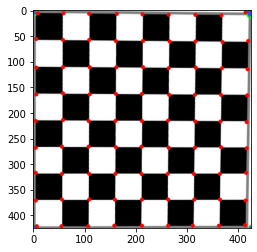

In [201]:
import numpy as np
import cv2
%matplotlib inline

img = cv2.imread('fitted_view.jpg')
# img = cv2.resize(img, (0, 0), fx=0.75, fy=0.75)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 81, 0.00001, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (255, 0, 0), -1)


plt.imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [202]:
corners = corners.reshape(81,2)

In [203]:
sorted_arr = corners[corners[:, 0].argsort()]

In [204]:
dist = corners[:,0]
dist = (corners[:,0] **2 + corners[:,1]**2)**0.5

In [205]:
x_min, y_min = corners[dist==dist.min()][0]
x_max, y_max = corners[dist==dist.max()][0]
y_max

419

In [206]:
diag = ((x_max - x_min)**2 + (y_max-y_min)**2)**0.5
cell_length = (diag/np.sqrt(2)) / 8
cell_length

51.06559813122725

In [207]:
a = np.array([round(3*cell_length/2),round(cell_length/2)])
a

array([77, 26])

In [208]:
img = cv2.imread('fitted_view.jpg')
img = cv2.circle(img, a, radius=2, color=(255, 255, 0), thickness=-1)
cv2.imshow('dst', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

65

In [210]:
def cell2Cord(cellName,cellLength):
    x_cord = ord(cellName[0]) - 96 - 0.5
    y_cord = 9 - int(cellName[1]) - 0.5
    return np.array([round(x_cord*cell_length), round(y_cord*cellLength)])

img = cv2.imread('fitted_view.jpg')
img = cv2.circle(img, cell2Cord("b3",cell_length), radius=3, color=(0, 0, 255), thickness=-1)
cv2.imshow('dst', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

    

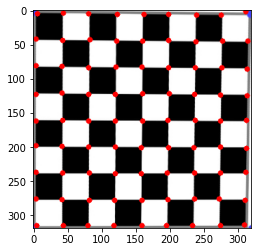

In [100]:
import numpy as np
import cv2
%matplotlib inline

img = cv2.imread('fitted_view.jpg')
img = cv2.resize(img, (0, 0), fx=0.75, fy=0.75)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 81, 0.00001, 10)
corners = np.int0(corners)

for corner in sorted_arr:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (255, 0, 0), -1)


plt.imshow(img)

## drawing lines using HoughLinesP

In [87]:
def draw_line(image, lines):
    lines_image = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8) 
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 255, 0), thickness = 3)
    
    image_with_lines = cv2.addWeighted(image, 0.8, lines_image, 1, 0.0)

    
    return(image_with_lines)
def get_lane(image):
    (height, width, _) = image.shape
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #canny edge detection function
    edged_img = cv2.Canny(gray_image,100, 120)

#     desired_region = [ (0, height), (width/2, height*0.65), (width, height) ]

#     cropped_image = region_of_interest(edged_img, np.array([desired_region], np.int32))

    lines = cv2.HoughLinesP(edged_img, rho = 2, theta = np.pi/180, threshold = 50, lines = np.array([]),
                             minLineLength = 40, maxLineGap = 150 )
    image_with_line = draw_line(image, lines)
    
    return (image_with_line)

img = cv2.imread('chessG.jpg')
image_detected = get_lane(img)
cv2.imshow('dst', img)
cv2.imshow('resualt', image_detected)
cv2.waitKey(0)
cv2.destroyAllWindows()


# finding contours using a Mask

In [88]:
img = cv2.imread("chessG.jpg")
hsv_pic = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
blur_kernel = np.ones((3, 3))/9
blur_img = cv2.filter2D(img, -1, blur_kernel)
hsv_pic = cv2.cvtColor(blur_img,cv2.COLOR_BGR2HSV)
lower = np.array([2, 7, 33])
upper = np.array([255, 255, 255])
output_pic = cv2.inRange(hsv_pic,lower,upper)
# erosion_pic = cv2.erode(output_pic,None,iterations = 4)
# dilate = cv2.dilate(erosion_pic,None,iterations = 4)
cnt, _ = cv2.findContours(output_pic, cv2.StereoBM_PREFILTER_XSOBEL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, cnt, -1, (0,225,0),3)
cv2.imshow("output_pic",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [89]:
img = cv2.imread("empty-board.jpg")
rect = cv2.minAreaRect(cnt[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
cv2.imshow("output_pic",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [90]:
x,y,w,h = cv2.boundingRect(cnt[0])

In [92]:
temp =  cv2.minAreaRect(cnt[0])
rect = cv2.minAreaRect(cnt[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
box

array([[529, 452],
       [529, 452],
       [528, 452],
       [528, 452]], dtype=int64)

In [93]:
type(box)

numpy.ndarray

In [18]:
img = cv2.imread("chessG.jpg")
# img = cv2.rectangle(img,box[0],box[2] , (0, 0, 255), 2)
# img = cv2.circle(img, box[0], radius=2, color=(0, 0, 255), thickness=-1)
# img = cv2.circle(img, box[1], radius=2, color=(0, 255, 0), thickness=-1)
# img = cv2.circle(img, box[2], radius=2, color=(255, 0, 0), thickness=-1)
img = cv2.circle(img, (4,340), radius=2, color=(0, 0, 255), thickness=-1)
cv2.imshow("output_pic",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
countor = cnt[0]
countor[:,0,:]


array([[112, 108],
       [111, 109],
       [100, 109],
       [ 99, 110],
       [ 94, 110],
       [ 93, 111],
       [ 92, 110],
       [ 88, 110],
       [ 87, 111],
       [ 66, 111],
       [ 65, 112],
       [ 63, 112],
       [ 63, 113],
       [ 62, 114],
       [ 62, 115],
       [ 60, 117],
       [ 60, 120],
       [ 59, 121],
       [ 59, 126],
       [ 58, 127],
       [ 58, 131],
       [ 57, 132],
       [ 57, 135],
       [ 56, 136],
       [ 56, 139],
       [ 55, 140],
       [ 55, 143],
       [ 54, 144],
       [ 54, 145],
       [ 53, 146],
       [ 53, 148],
       [ 52, 149],
       [ 52, 150],
       [ 51, 151],
       [ 51, 156],
       [ 50, 157],
       [ 50, 161],
       [ 49, 162],
       [ 49, 164],
       [ 48, 165],
       [ 48, 168],
       [ 47, 169],
       [ 47, 175],
       [ 46, 176],
       [ 46, 178],
       [ 45, 179],
       [ 45, 181],
       [ 44, 182],
       [ 44, 184],
       [ 43, 185],
       [ 43, 190],
       [ 42, 191],
       [ 42,

### creating pandas DataFrame from contours

In [77]:
df = pd.DataFrame(countor[:,0,:],columns=["x", "y"])
df

,x,y
0,112,108
1,111,109
2,100,109
3,99,110
4,94,110
...,...,...
316,188,111
317,177,111
318,175,109
319,162,109


In [83]:
min_x = df[ (df["x"] == min(df["x"]))]
min_x[ min_x["y"]==min(min_x["y"]) ]

,x,y
129,4,340


In [19]:
max_Area = 0
desired_index = 0
for i in range(len(cnt)):
    if len(rect) == 3:
        rect = cnt[i]
        w = rect[1][0]
        h = rect[1][1]
        area = w*h
        if area > max_Area:
            max_Area = area
            index = i
    else:
        continue

    
    

IndexError: index 1 is out of bounds for axis 0 with size 1

In [31]:
img = cv2.imread("empty-board.jpg")
hsv_pic = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
blur_kernel = np.ones((3, 3))/9
blur_img = cv2.filter2D(img, -1, blur_kernel)
hsv_pic = cv2.cvtColor(blur_img,cv2.COLOR_BGR2HSV)
lower = np.array([2, 7, 33])
upper = np.array([255, 255, 255])
output_pic = cv2.inRange(hsv_pic,lower,upper)
# erosion_pic = cv2.erode(output_pic,None,iterations = 4)
# dilate = cv2.dilate(erosion_pic,None,iterations = 4)
cnt, _ = cv2.findContours(output_pic, cv2.StereoBM_PREFILTER_XSOBEL, cv2.CHAIN_APPROX_SIMPLE)
max_Area = 0
desired_index = 0
for i in range(len(cnt)):
    rect = cv2.minAreaRect(cnt[i])
    if len(rect) == 3:
        w = rect[1][0]
        h = rect[1][1]
        area = w*h
        if area > max_Area:
            max_Area = area
            desired_index= i
    else:
        continue

In [33]:
rect = cv2.minAreaRect(cnt[desired_index])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
cv2.imshow("output_pic",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
desired_index

162

In [34]:
my_img = cv2.imread("chessG.jpg")
grayPic = cv2.cvtColor(my_img,cv2.COLOR_BGR2GRAY)
reduceNoise = cv2.GaussianBlur(grayPic,(5,5),cv2.BORDER_DEFAULT)
edged = cv2.Canny(reduceNoise,10,20)
lines = cv2.HoughLinesP(edged, rho = 2, theta = np.pi/180, threshold = 50, lines = np.array([]),
                             minLineLength = 40, maxLineGap = 150 )
cv2.imshow("output_pic",edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
lines

array([[[ 22, 399, 539, 399]],

       [[ 15, 468, 555, 468]],

       [[ 59, 252, 495, 252]],

       [[ 74, 193, 476, 193]],

       [[ 80, 167, 468, 167]],

       [[ 32, 355, 526, 355]],

       [[ 11, 444, 553, 444]],

       [[ 42, 316, 513, 316]],

       [[ 66, 220, 484, 220]],

       [[ 52, 275, 505, 275]],

       [[ 69, 214,  84, 154]],

       [[167, 469, 195, 145]],

       [[ 81, 163, 467, 163]],

       [[277, 151, 288, 470]],

       [[  9, 449, 555, 449]],

       [[ 57, 257, 497, 257]],

       [[464, 155, 553, 445]],

       [[228, 471, 234, 147]],

       [[362, 146, 407, 466]],

       [[ 48, 281, 505, 281]],

       [[109, 446, 151, 147]],

       [[440, 151, 531, 469]],

       [[  7, 461,  83, 155]],

       [[320, 147, 348, 469]],

       [[ 65, 356, 498, 363]],

       [[  9, 448, 517, 439]],

       [[ 40, 321, 482, 321]],

       [[400, 147, 468, 467]],

       [[ 51, 276, 505, 276]],

       [[ 92, 149, 433, 149]],

       [[ 65, 223, 461, 223]],

       [

In [35]:
def draw_line(image, lines):
    lines_image = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8) 
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 255, 0), thickness = 3)
    
    image_with_lines = cv2.addWeighted(image, 0.8, lines_image, 1, 0.0)

    
    return(image_with_lines)

image_with_line = draw_line(my_img, lines)


In [39]:
cv2.imshow("output_pic",image_with_line)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
lines.shape
# x1, y1, x2, y2

(96, 1, 4)

# finding the 4 corners and straghting

In [20]:
color = cv2.imread('chessG.jpg', cv2.IMREAD_COLOR)
color = cv2.resize(color, (0, 0), fx=0.15, fy=0.15)
# RGB to gray
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)
# cv2.imwrite('output/thresh.png', thresh)
# Edge detection
edges = cv2.Canny(gray, 100, 200, apertureSize=3)
# Save the edge detected image
cv2.imwrite('edges.png', edges)

True

In [21]:
def cyclic_intersection_pts(pts):
    """
    Sorts 4 points in clockwise direction with the first point been closest to 0,0
    Assumption:
        There are exactly 4 points in the input and
        from a rectangle which is not very distorted
    """
    if pts.shape[0] != 4:
        return None

    # Calculate the center
    center = np.mean(pts, axis=0)

    # Sort the points in clockwise
    cyclic_pts = [
        # Top-left
        pts[np.where(np.logical_and(pts[:, 0] < center[0], pts[:, 1] < center[1]))[0][0], :],
        # Top-right
        pts[np.where(np.logical_and(pts[:, 0] > center[0], pts[:, 1] < center[1]))[0][0], :],
        # Bottom-Right
        pts[np.where(np.logical_and(pts[:, 0] > center[0], pts[:, 1] > center[1]))[0][0], :],
        # Bottom-Left
        pts[np.where(np.logical_and(pts[:, 0] < center[0], pts[:, 1] > center[1]))[0][0], :]
    ]

    return np.array(cyclic_pts)

#--------------------------------------------
def drawHoughLines(image, lines, output):
    out = image.copy()
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 10000 * (-b))
        y1 = int(y0 + 10000 * (a))
        x2 = int(x0 - 10000 * (-b))
        y2 = int(y0 - 10000 * (a))
        cv2.line(out, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.imwrite(output, out)
import numpy as np


def polar2cartesian(rho: float, theta_rad: float, rotate90: bool = False):
    """
    Converts line equation from polar to cartesian coordinates
    Args:
        rho: input line rho
        theta_rad: input line theta
        rotate90: output line perpendicular to the input line
    Returns:
        m: slope of the line
           For horizontal line: m = 0
           For vertical line: m = np.nan
        b: intercept when x=0
    """
    x = np.cos(theta_rad) * rho
    y = np.sin(theta_rad) * rho
    m = np.nan
    if not np.isclose(x, 0.0):
        m = y / x
    if rotate90:
        if m is np.nan:
            m = 0.0
        elif np.isclose(m, 0.0):
            m = np.nan
        else:
            m = -1.0 / m
    b = 0.0
    if m is not np.nan:
        b = y - m * x

    return m, b


def solve4x(y: float, m: float, b: float):
    """
    From y = m * x + b
         x = (y - b) / m
    """
    if np.isclose(m, 0.0):
        return 0.0
    if m is np.nan:
        return b
    return (y - b) / m


def solve4y(x: float, m: float, b: float):
    """
    y = m * x + b
    """
    if m is np.nan:
        return b
    return m * x + b


def intersection(m1: float, b1: float, m2: float, b2: float):
    # Consider y to be equal and solve for x
    # Solve:
    #   m1 * x + b1 = m2 * x + b2
    x = (b2 - b1) / (m1 - m2)
    # Use the value of x to calculate y
    y = m1 * x + b1

    return int(round(x)), int(round(y))


def line_end_points_on_image(rho: float, theta: float, image_shape: tuple):
    """
    Returns end points of the line on the end of the image
    Args:
        rho: input line rho
        theta: input line theta
        image_shape: shape of the image
    Returns:
        list: [(x1, y1), (x2, y2)]
    """
    m, b = polar2cartesian(rho, theta, True)

    end_pts = []

    if not np.isclose(m, 0.0):
        x = int(0)
        y = int(solve4y(x, m, b))
        if point_on_image(x, y, image_shape):
            end_pts.append((x, y))
            x = int(image_shape[1] - 1)
            y = int(solve4y(x, m, b))
            if point_on_image(x, y, image_shape):
                end_pts.append((x, y))

    if m is not np.nan:
        y = int(0)
        x = int(solve4x(y, m, b))
        if point_on_image(x, y, image_shape):
            end_pts.append((x, y))
            y = int(image_shape[0] - 1)
            x = int(solve4x(y, m, b))
            if point_on_image(x, y, image_shape):
                end_pts.append((x, y))

    return end_pts


def hough_lines_end_points(lines: np.array, image_shape: tuple):
    """
    Returns end points of the lines on the edge of the image
    """
    if len(lines.shape) == 3 and \
            lines.shape[1] == 1 and lines.shape[2] == 2:
        lines = np.squeeze(lines)
    end_pts = []
    for line in lines:
        rho, theta = line
        end_pts.append(
            line_end_points_on_image(rho, theta, image_shape))
    return end_pts


def hough_lines_intersection(lines: np.array, image_shape: tuple):
    """
    Returns the intersection points that lie on the image
    for all combinations of the lines
    """
    if len(lines.shape) == 3 and \
            lines.shape[1] == 1 and lines.shape[2] == 2:
        lines = np.squeeze(lines)
    lines_count = len(lines)
    intersect_pts = []
    for i in range(lines_count - 1):
        for j in range(i + 1, lines_count):
            m1, b1 = polar2cartesian(lines[i][0], lines[i][1], True)
            m2, b2 = polar2cartesian(lines[j][0], lines[j][1], True)
            x, y = intersection(m1, b1, m2, b2)
            if point_on_image(x, y, image_shape):
                intersect_pts.append([x, y])
    return np.array(intersect_pts, dtype=int)


def point_on_image(x: int, y: int, image_shape: tuple):
    """
    Returns true is x and y are on the image
    """
    return 0 <= y < image_shape[0] and 0 <= x < image_shape[1]